In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs
from utils.mpl import plot_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=True)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='usual', group=True)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='unusual', group=True)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='rare', group=True)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='epic', group=True)


Text(0.5, 1.0, 'Kongz Goldz average in 5 days')

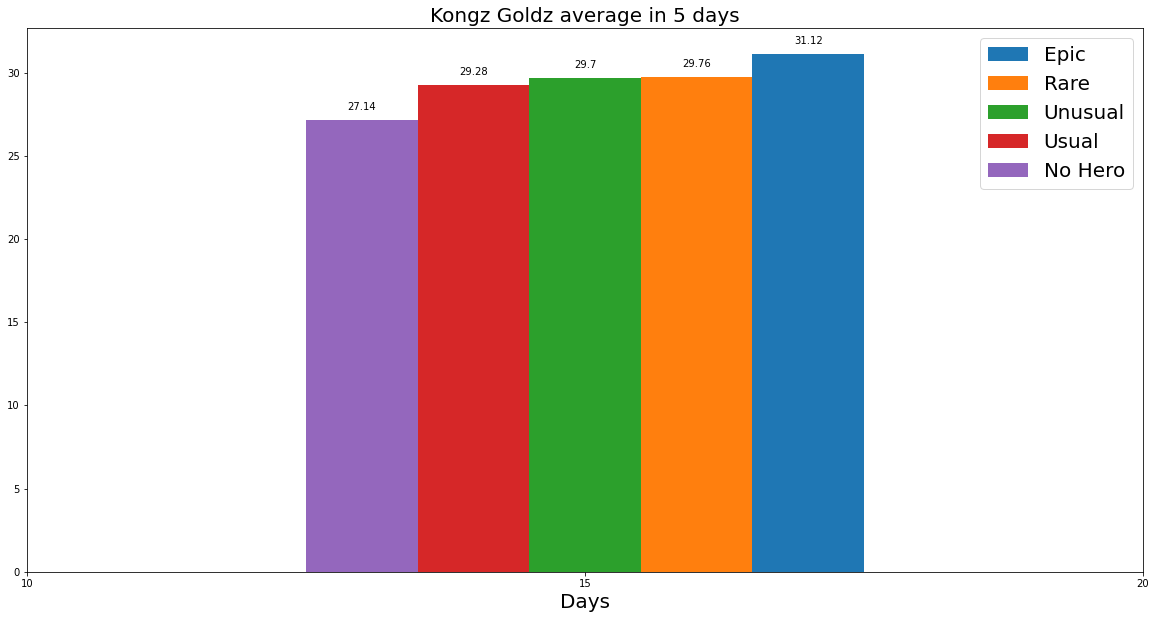

In [3]:
bar_width = 1

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(df4[df4.day == 15].day + 2*bar_width, df4[df4.day == 15].goldz, bar_width, label=f'Epic')
ax.bar(df3[df3.day == 15].day + bar_width, df3[df3.day == 15].goldz, bar_width,label=f'Rare')
ax.bar(df2[df2.day == 15].day , df2[df2.day == 15].goldz, bar_width,label=f'Unusual')
ax.bar(df1[df1.day == 15].day - bar_width, df1[df1.day == 15].goldz, bar_width,label=f'Usual')
ax.bar(df[df.day == 15].day - 2 * bar_width, df[df.day == 15].goldz, bar_width,label=f'No Hero')

plot_scatter(df[df.day == 15].day - 2*bar_width,df[df.day == 15].goldz)
plot_scatter(df1[df1.day == 15].day- bar_width,df1[df1.day == 15].goldz)
plot_scatter(df2[df2.day == 15].day ,df2[df2.day == 15].goldz)
plot_scatter(df3[df3.day == 15].day + bar_width,df3[df3.day == 15].goldz)
plot_scatter(df4[df4.day == 15].day + 2* bar_width,df4[df4.day == 15].goldz)

ax.set_xlabel('Days',fontsize=20)
ax.legend(prop={'size': 20})
plt.xticks([10,15,20])
ax.set_title(f"Kongz Goldz average in 5 days", fontsize=20)

In [23]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='epic', group=False)

Text(0.5, 1.0, 'Kongz Goldz average per attack')

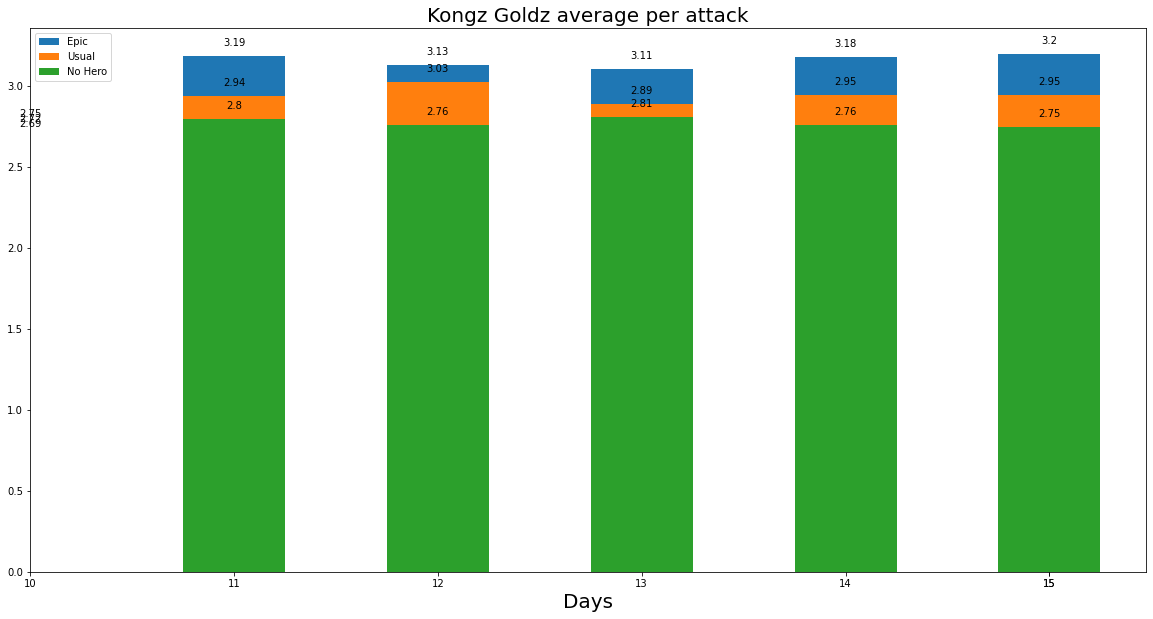

In [5]:
bar_width = 0.5

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(df4[10:15].day, df4[10:15].goldz / 2 , bar_width, label=f'Epic')
# ax.bar(df3[df3.day == 15].day + bar_width, df3[df3.day == 15].goldz, bar_width,label=f'Rare')
# ax.bar(df2[df2.day == 15].day , df2[df2.day == 15].goldz, bar_width,label=f'Unusual')
ax.bar(df1[10:15].day, df1[10:15].goldz /2, bar_width,label=f'Usual')
ax.bar(df[10:15].day, df[10:15].goldz / 2 , bar_width,label=f'No Hero')



plot_scatter(df.day ,df.goldz / 2)
plot_scatter(df1.day,df1.goldz/2)
# plot_scatter(df2.day ,df2.goldz)
# plot_scatter(df3.day + bar_width,df3.goldz)
plot_scatter(df4.day,df4.goldz /2)

ax.set_xlabel('Days',fontsize=20)
ax.legend(prop={'size': 10})
plt.xticks([10,11,12,13,15,14,15])
ax.set_title(f"Kongz Goldz average per attack", fontsize=20)

In [6]:
df[10:15][['day', 'goldz']]

,day,goldz
10,11.0,5.60
11,12.0,5.52
12,13.0,5.62
13,14.0,5.52
14,15.0,5.50


In [7]:
df1[10:15][['day', 'goldz']].T

,10,11,12,13,14
day,11.00,12.00,13.00,14.0,15.0
goldz,5.88,6.06,5.78,5.9,5.9


In [39]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='kongz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', names = ['No Hero', 'Usual', 'Unusual', 'Rare', 'Epic'], pk='day', limits=(10,15))
df

,day,No Hero,Usual,Unusual,Rare,Epic
10,11.0,5.42,5.82,5.92,6.24,6.26
11,12.0,5.54,5.80,5.80,6.22,6.34
12,13.0,5.60,6.00,5.90,6.04,6.30
13,14.0,5.48,5.98,6.12,5.94,6.38
14,15.0,5.42,5.84,5.84,5.98,6.28


Text(0.5, 1.0, 'Kongz Goldz average at day 10 - 15')

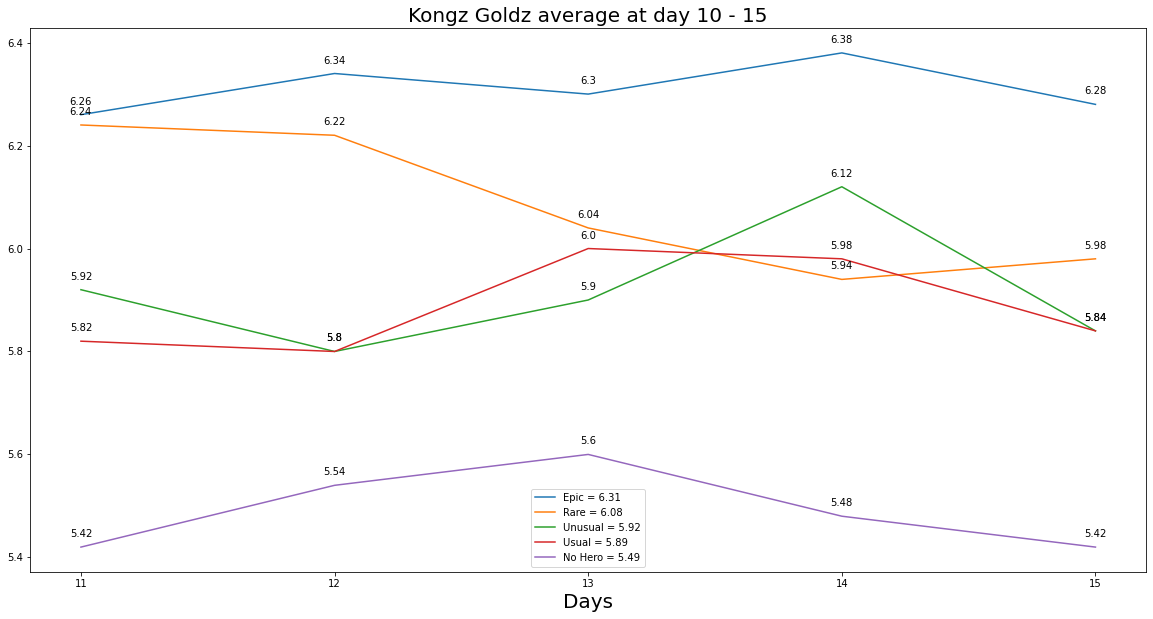

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(df.day, df.Epic, label=f'Epic = {round(df.Epic.mean(),2)}')
ax.plot(df.day, df.Rare, label=f'Rare = {round(df.Rare.mean(),2)}')
ax.plot(df.day, df.Unusual, label=f'Unusual = {round(df.Unusual.mean(),2)}')
ax.plot(df.day, df.Usual, label=f'Usual = {round(df.Usual.mean(),2)}')
ax.plot(df.day, df['No Hero'], label=f'No Hero = {round(df["No Hero"].mean(),2)}')

plot_scatter(df.day ,df.Usual)
plot_scatter(df.day,df.Unusual)
plot_scatter(df.day ,df.Rare)
plot_scatter(df.day ,df.Epic)
plot_scatter(df.day ,df['No Hero'])

ax.set_xlabel('Days',fontsize=20)
ax.legend(prop={'size': 10})
plt.xticks(df.day)
ax.set_title(f"Kongz Goldz average at day 10 - 15", fontsize=20)
